<h1 align='center' style='color:blue'>Credit Risk Modeling Project</h1>

In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [4]:
df_customers=pd.read_csv("Data/customers.csv")
df_loans=pd.read_csv("Data/loans.csv")
df_bureau=pd.read_csv('Data/bureau_data.csv')
df_customers.shape,df_loans.shape,df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [5]:
df_merge1=pd.merge(df_customers,df_loans, on ="cust_id")
df_merge=pd.merge(df_merge1,df_bureau,on ="cust_id")
df_merge.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4


In [6]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [7]:
## change the default value type from bool to int
df_merge['default']=df_merge['default'].astype(int)
df_merge['default'].value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

### By observing the default class counts it's clearly showing an class imbalance. Which can be adjusted by using Oversampling, undersampling or SMOTE techniques, we can do on furture and fits the perfet one.

In [8]:
X=df_merge.drop('default',axis='columns')
y=df_merge['default']


X_train,X_test,y_train,y_test=train_test_split(X, y, stratify=y ,test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((37500, 32), (12500, 32))

In [9]:
df_train= pd.concat([X_train, y_train],axis='columns')
df_test= pd.concat([X_test, y_test],axis='columns')
df_train.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2020-10-31,2020-11-11,4,2,152,20,118,4,36,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,2022-10-22,2022-10-27,3,1,160,10,62,5,5,0


In [10]:
df_train.shape,df_test.shape

((37500, 33), (12500, 33))

In [11]:
df_train.describe()

,age,income,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,...,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
count,37500.000000,3.750000e+04,37500.000000,37500.000000,37500.000000,3.750000e+04,3.750000e+04,3.750000e+04,3.750000e+04,3.750000e+04,...,3.750000e+04,3.750000e+04,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000
mean,39.540587,2.633326e+06,1.944533,15.997787,418866.253333,4.699692e+06,3.996068e+06,8.029068e+04,7.192922e+05,3.196854e+06,...,1.333820e+06,9.862989e+05,2.502907,1.001120,76.11104,4.844853,26.672613,5.008533,43.424880,0.085947
std,9.858344,2.623781e+06,1.535943,8.921041,169035.021773,6.257833e+06,5.371862e+06,1.131281e+05,9.669352e+05,4.297490e+06,...,1.213674e+06,1.043145e+06,1.119070,0.814021,43.76852,5.841396,32.779424,2.029236,29.392857,0.280289
min,18.000000,0.000000e+00,0.000000,1.000000,110001.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,0.000000e+00,1.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,8.020000e+05,0.000000,8.000000,302001.000000,1.142000e+06,9.610000e+05,1.922000e+04,1.729800e+05,7.688000e+05,...,4.221975e+05,2.870402e+05,1.000000,0.000000,42.00000,0.000000,0.000000,4.000000,18.000000,0.000000
50%,39.000000,1.885000e+06,2.000000,16.000000,400001.000000,2.644000e+06,2.230000e+06,4.460000e+04,4.014000e+05,1.784000e+06,...,9.974275e+05,6.650145e+05,3.000000,1.000000,71.00000,3.000000,13.000000,5.000000,39.000000,0.000000
75%,46.000000,3.326250e+06,3.000000,24.000000,560001.000000,5.178000e+06,4.619000e+06,9.242000e+04,8.314200e+05,3.695200e+06,...,1.784879e+06,1.234063e+06,4.000000,2.000000,107.00000,8.000000,46.000000,6.000000,67.000000,0.000000
max,70.000000,1.199900e+07,5.000000,31.000000,700001.000000,5.217500e+07,4.781900e+07,5.293544e+06,8.607420e+06,3.825520e+07,...,5.000000e+06,7.846643e+06,4.000000,2.000000,223.00000,24.000000,171.000000,9.000000,99.000000,1.000000


In [12]:
df_train.isnull().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [13]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [14]:
mode_residence=df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [15]:
df_train['residence_type'].fillna(mode_residence,inplace=True)
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [16]:
## now we just do it for test data set also
df_test['residence_type'].fillna(mode_residence,inplace=True)

In [17]:
# check the duplicated rows
df_train.duplicated().sum()

0

In [18]:
## lets catch numeric columns and categorical columns
numeric_columns = df_train.columns[df_train.dtypes.apply(lambda x: x.kind in 'biufc')].tolist()
numeric_columns.remove('default')
print("Numeric Columns:", numeric_columns)
print()

categorical_columns = df_train.columns[df_train.dtypes.apply(lambda x: x.kind in 'O')].tolist()
list_col=['cust_id','loan_id','disbursal_date','installment_start_dt']
for i in list_col:
    categorical_columns.remove(i)
categorical_columns.append('default')
print("Categorical Columns:", categorical_columns)


Numeric Columns: ['age', 'income', 'number_of_dependants', 'years_at_current_address', 'zipcode', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months', 'principal_outstanding', 'bank_balance_at_application', 'number_of_open_accounts', 'number_of_closed_accounts', 'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

Categorical Columns: ['gender', 'marital_status', 'employment_status', 'residence_type', 'city', 'state', 'loan_purpose', 'loan_type', 'default']


In [19]:
def create_boxplots(df, numeric_columns):
    """
    Create boxplots for all numerical columns in a grid layout.
    
    Parameters:
    - df: DataFrame containing the data
    - numeric_columns: List of numerical column names to plot
    """
    # Calculate the number of rows needed
    num_cols = len(numeric_columns)
    cols_per_row = 4
    num_rows = (num_cols + cols_per_row - 1) // cols_per_row
    
    # Create a figure with subplots
    fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 5*num_rows))
    
    # Flatten the axes array for easier indexing
    axes = axes.flatten() if num_rows > 1 else axes
    
    # Create boxplots for each numerical column
    for i, col in enumerate(numeric_columns):
        sns.boxplot(data=df_train, y=col, ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_xlabel('')  # Remove x-label as it's not needed for boxplots
    
    # Remove any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

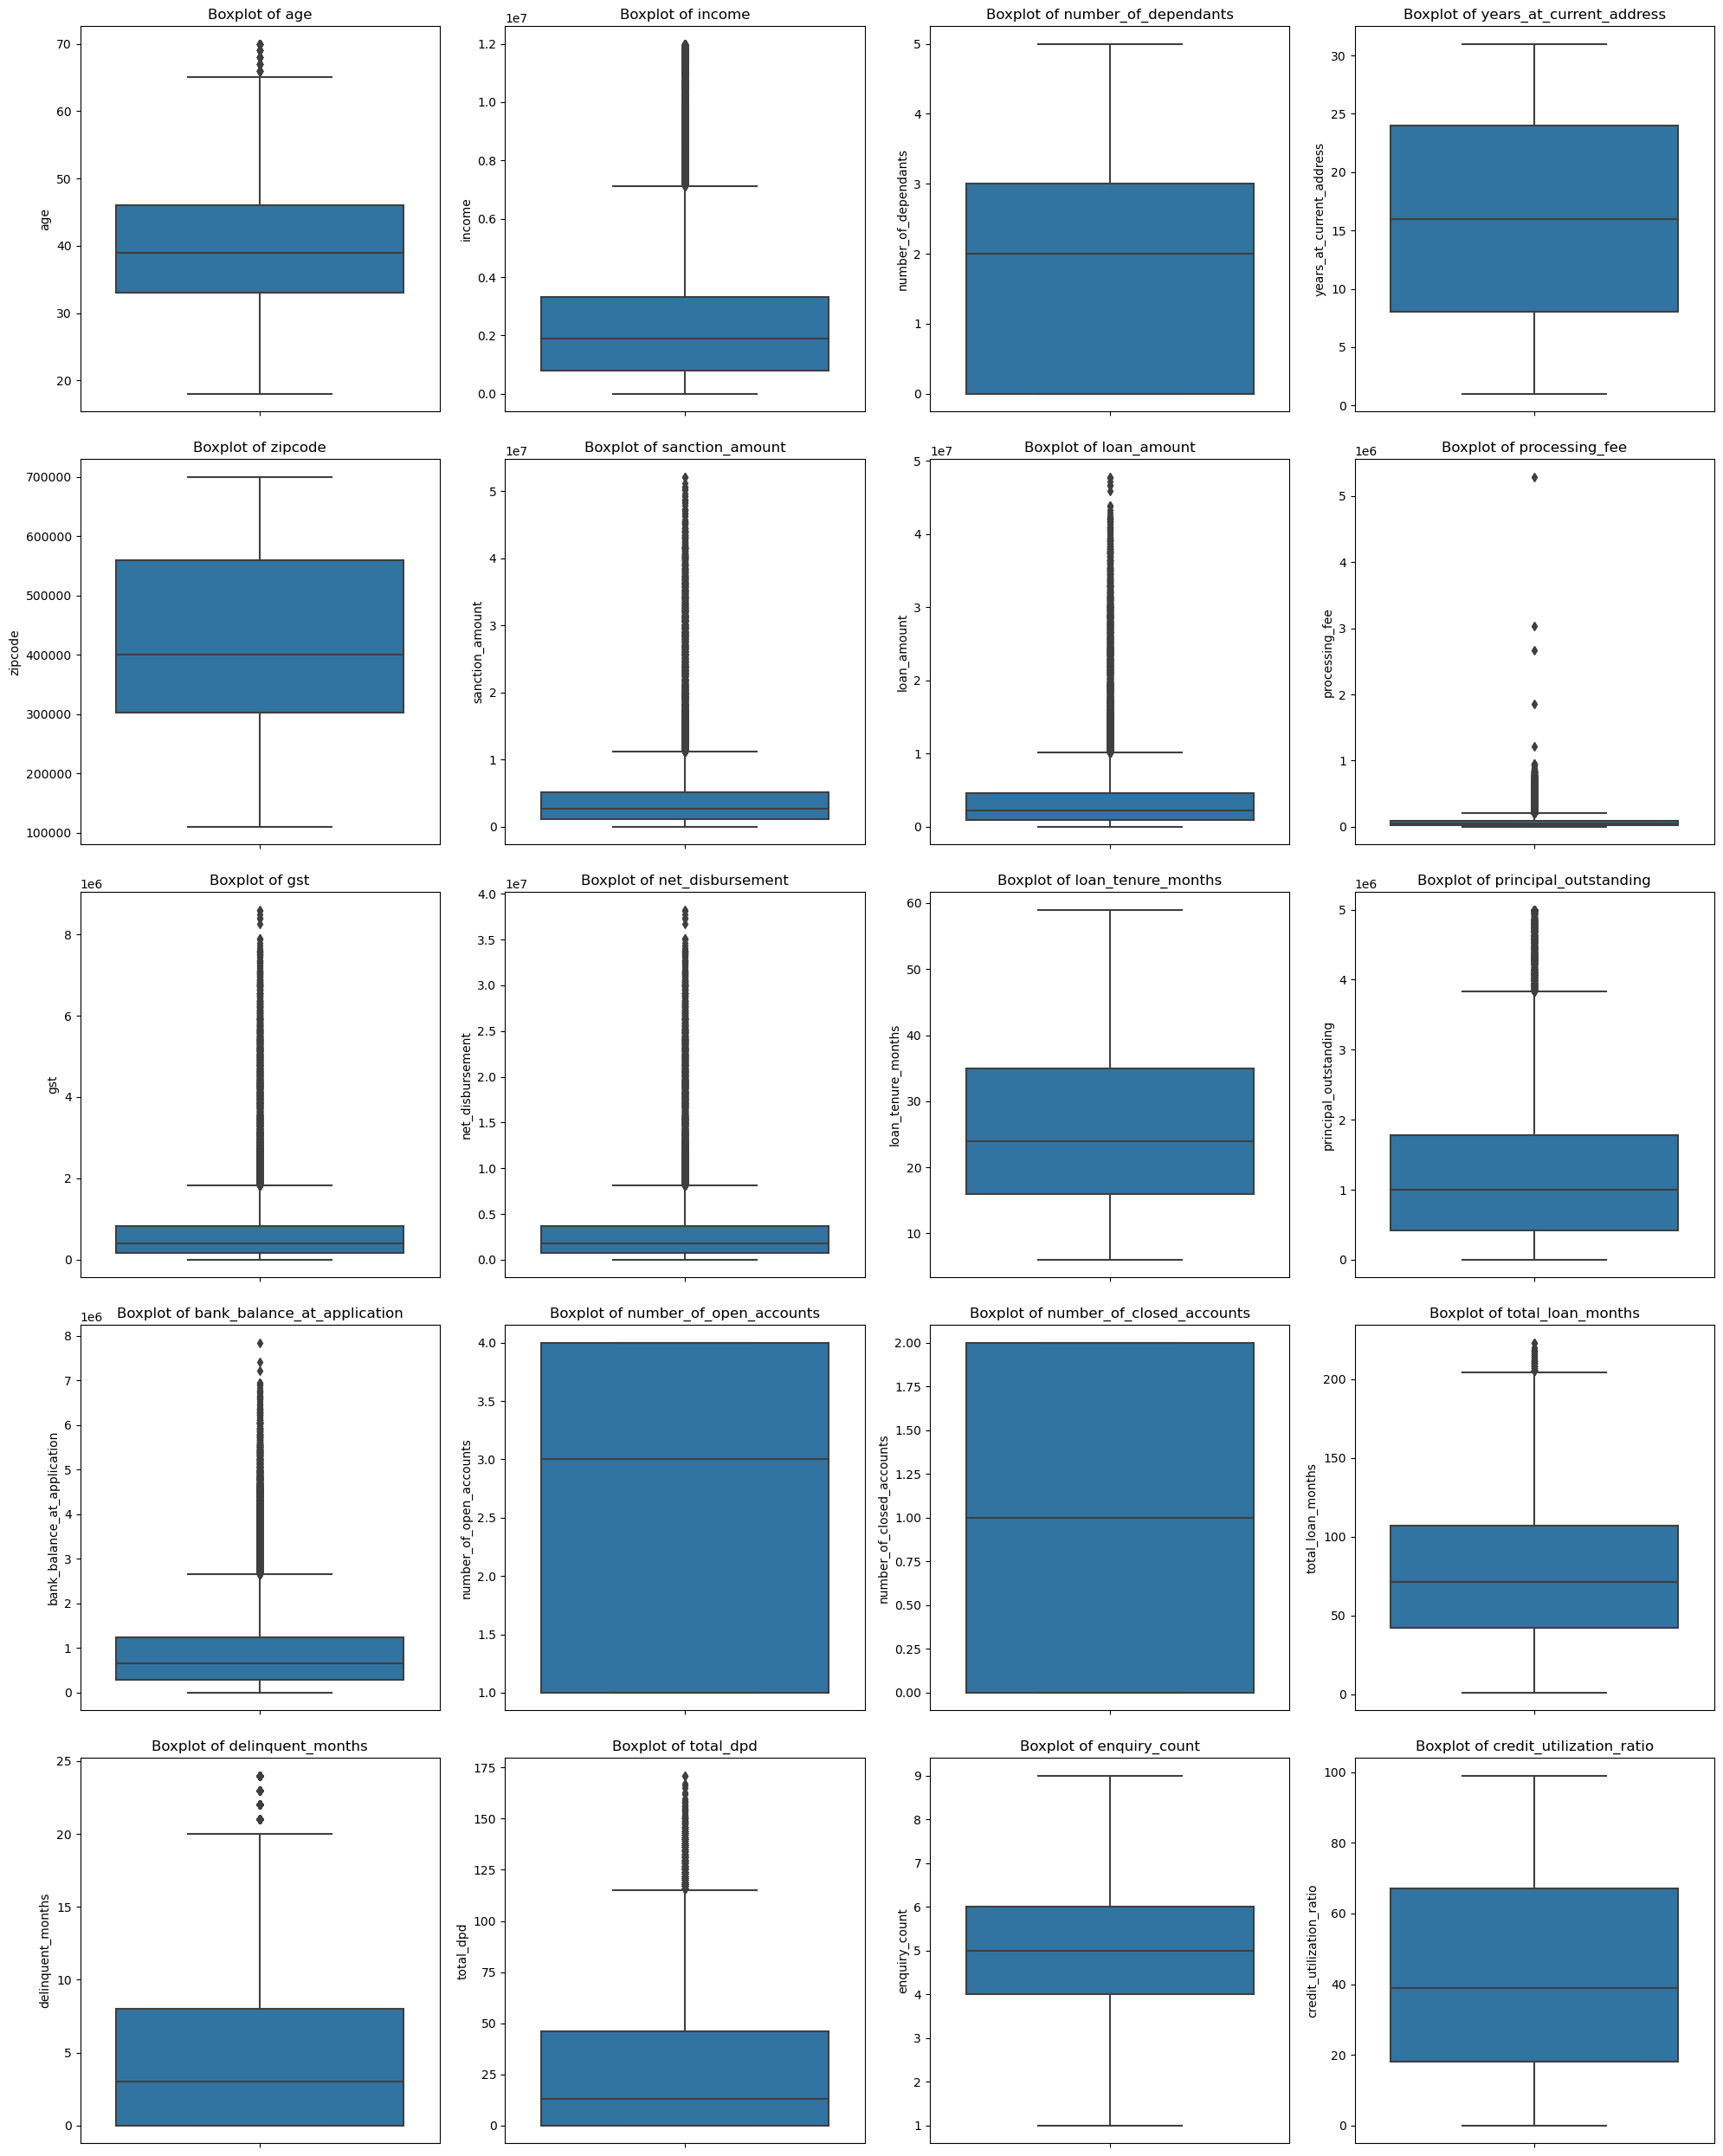

In [20]:
create_boxplots(df_train,numeric_columns)

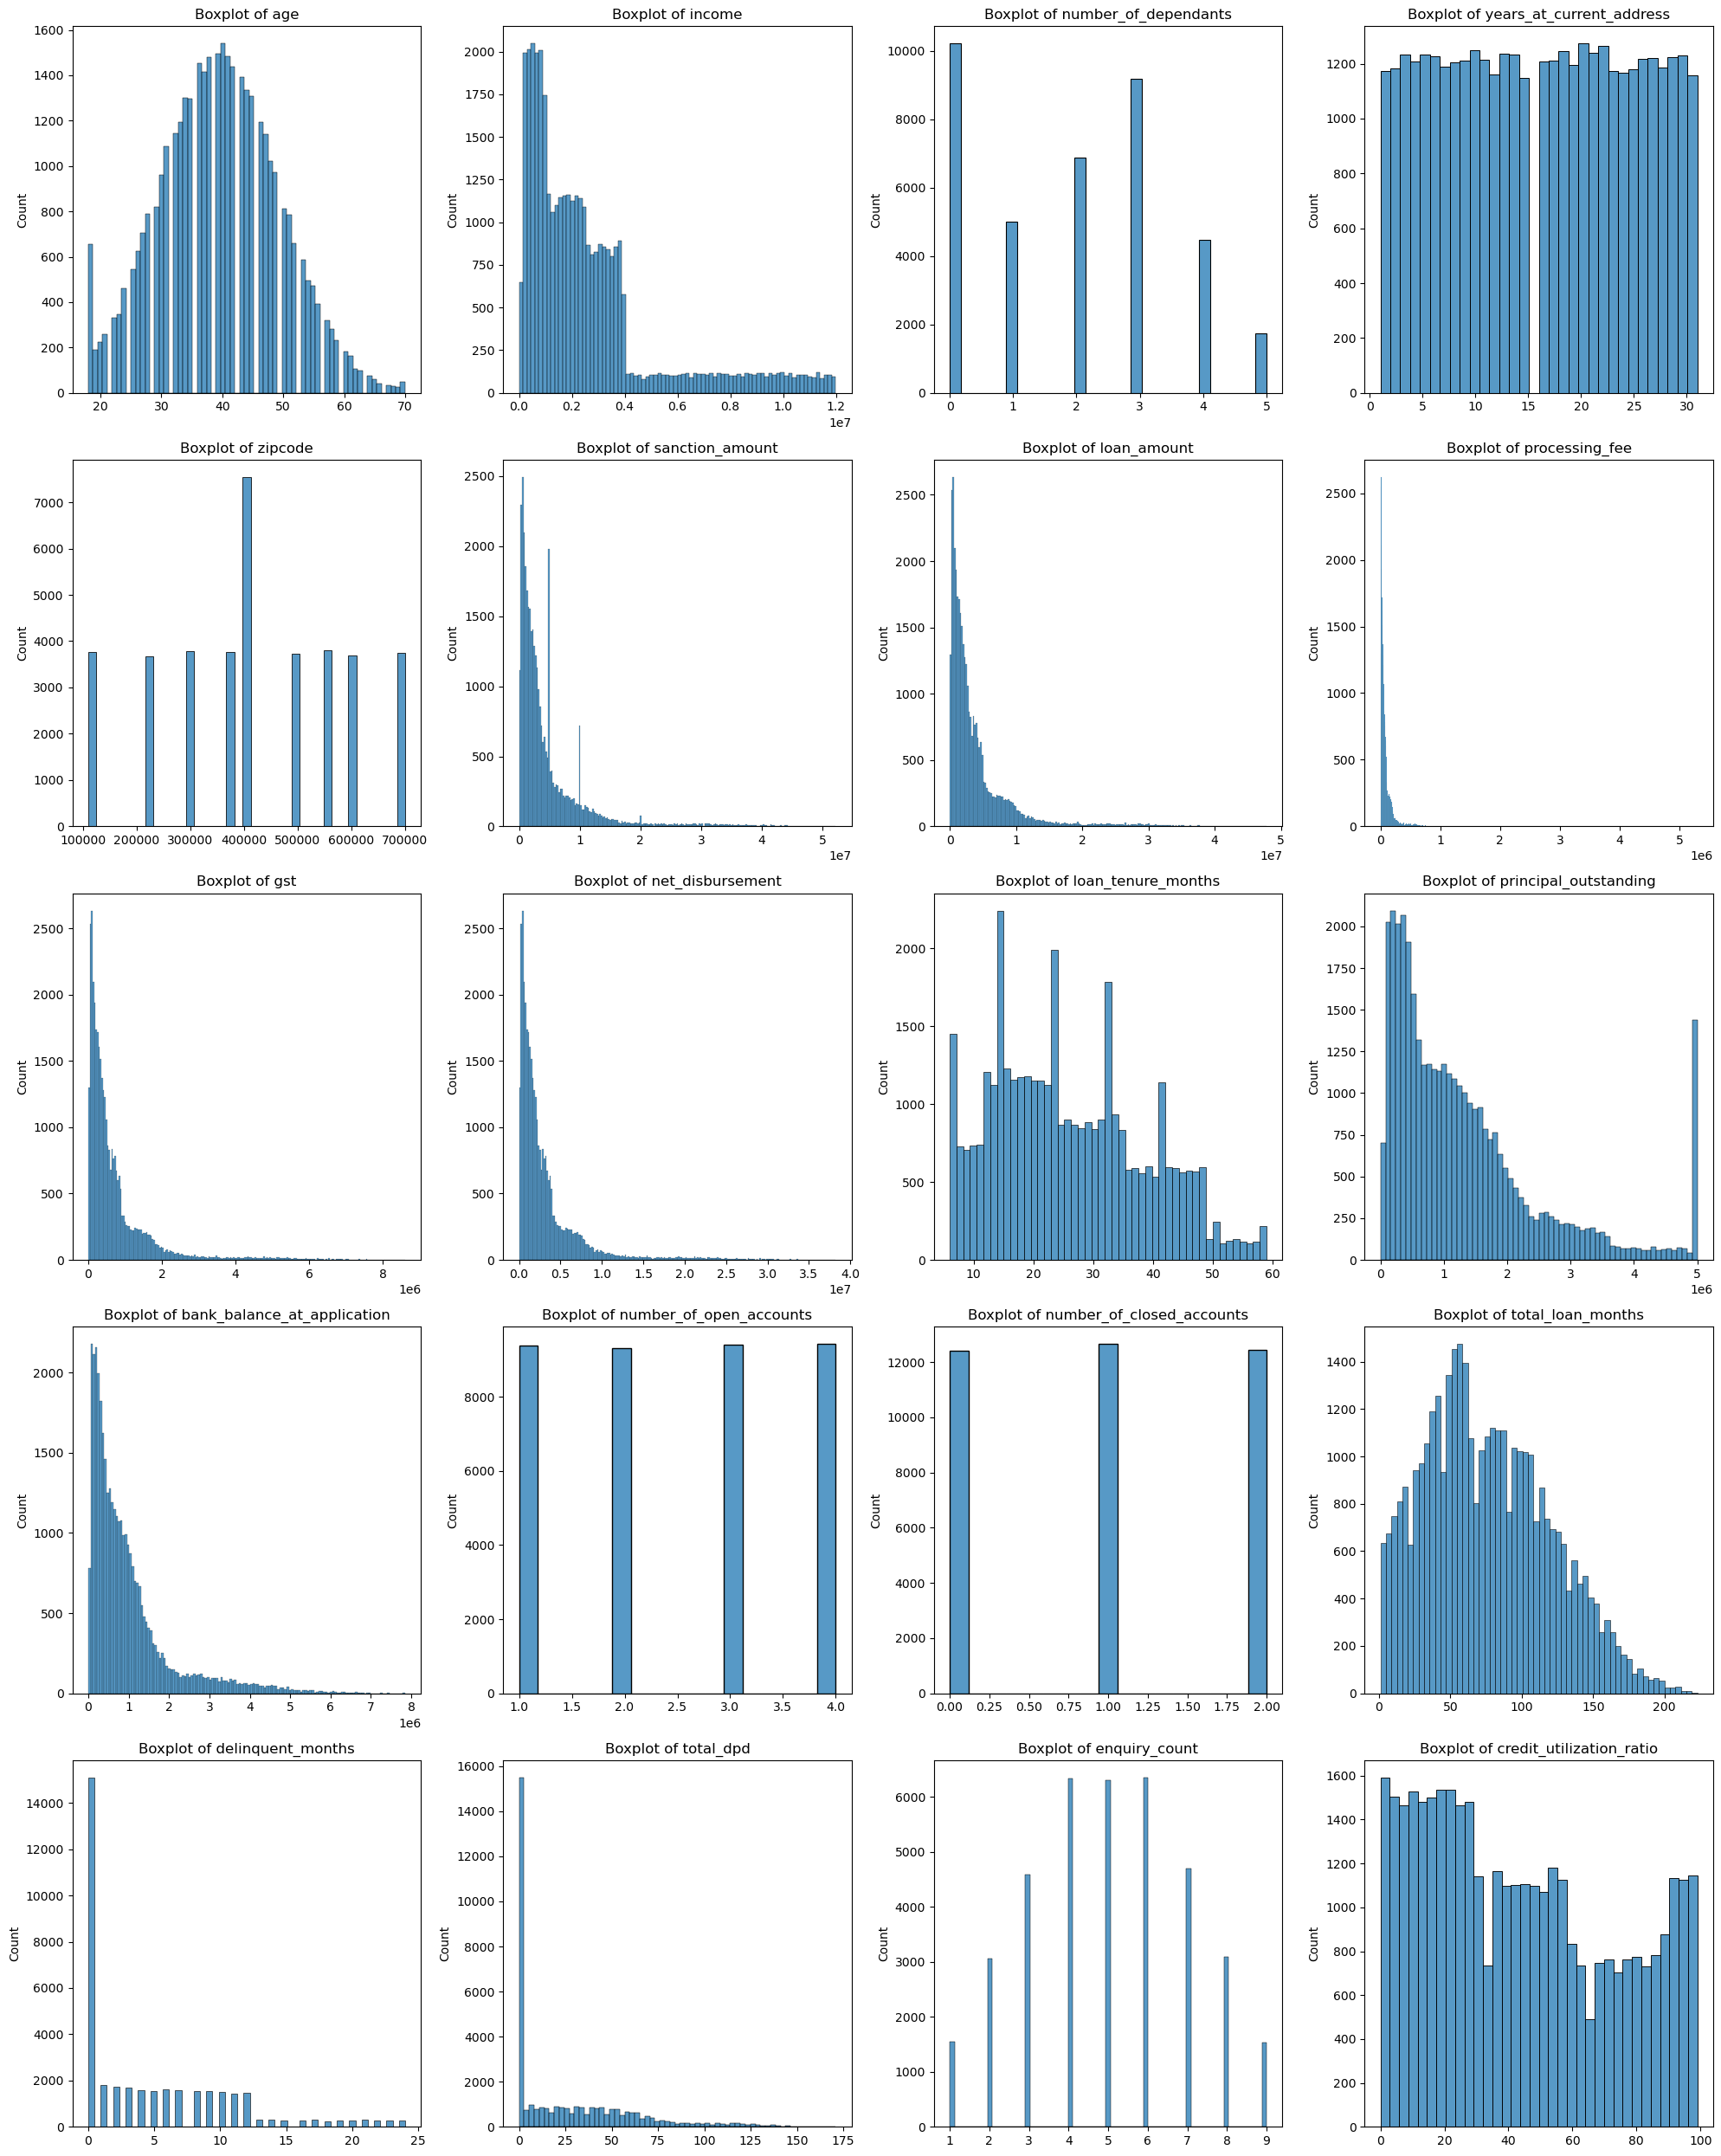

In [21]:
def create_histplots(df, numeric_columns):
    # Calculate the number of rows needed
    num_cols = len(numeric_columns)
    cols_per_row = 4
    num_rows = (num_cols + cols_per_row - 1) // cols_per_row
    
    # Create a figure with subplots
    fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 5*num_rows))
    
    # Flatten the axes array for easier indexing
    axes = axes.flatten() if num_rows > 1 else axes
    
    # Create boxplots for each numerical column
    for i, col in enumerate(numeric_columns):
        sns.histplot(data=df_train[col], ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_xlabel('')  # Remove x-label as it's not needed for boxplots
    
    # Remove any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()
create_histplots(df_train,numeric_columns)

### looks like processing fee got some issue


In [22]:
df_train.processing_fee.describe()

count    3.750000e+04
mean     8.029068e+04
std      1.131281e+05
min      0.000000e+00
25%      1.922000e+04
50%      4.460000e+04
75%      9.242000e+04
max      5.293544e+06
Name: processing_fee, dtype: float64

In [23]:
df_train_1=df_train[df_train['processing_fee']/df_train['loan_amount']<0.03].copy()
df_train_1.shape

(37488, 33)

In [24]:
df_test=df_test[df_test['processing_fee']/df_test['loan_amount']<0.03].copy()
df_test.shape

(12497, 33)

## cleaning categorical columns

In [25]:
for col in categorical_columns:
    print(col ,"-->" ,df_train_1[col].unique())

gender --> ['M' 'F']
marital_status --> ['Married' 'Single']
employment_status --> ['Self-Employed' 'Salaried']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state --> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
loan_purpose --> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
default --> [0 1]


In [26]:
df_train_1['loan_purpose']=df_train_1['loan_purpose'].replace('Personaal','Personal')
df_test['loan_purpose']=df_test['loan_purpose'].replace('Personaal','Personal')

In [27]:
for col in categorical_columns:
    print(col ,"-->" ,df_train_1[col].unique())

gender --> ['M' 'F']
marital_status --> ['Married' 'Single']
employment_status --> ['Self-Employed' 'Salaried']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state --> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
loan_purpose --> ['Home' 'Education' 'Personal' 'Auto']
loan_type --> ['Secured' 'Unsecured']
default --> [0 1]


<h3 align='center' style='color:blue'>Exploratory Data Analysis<h3/>

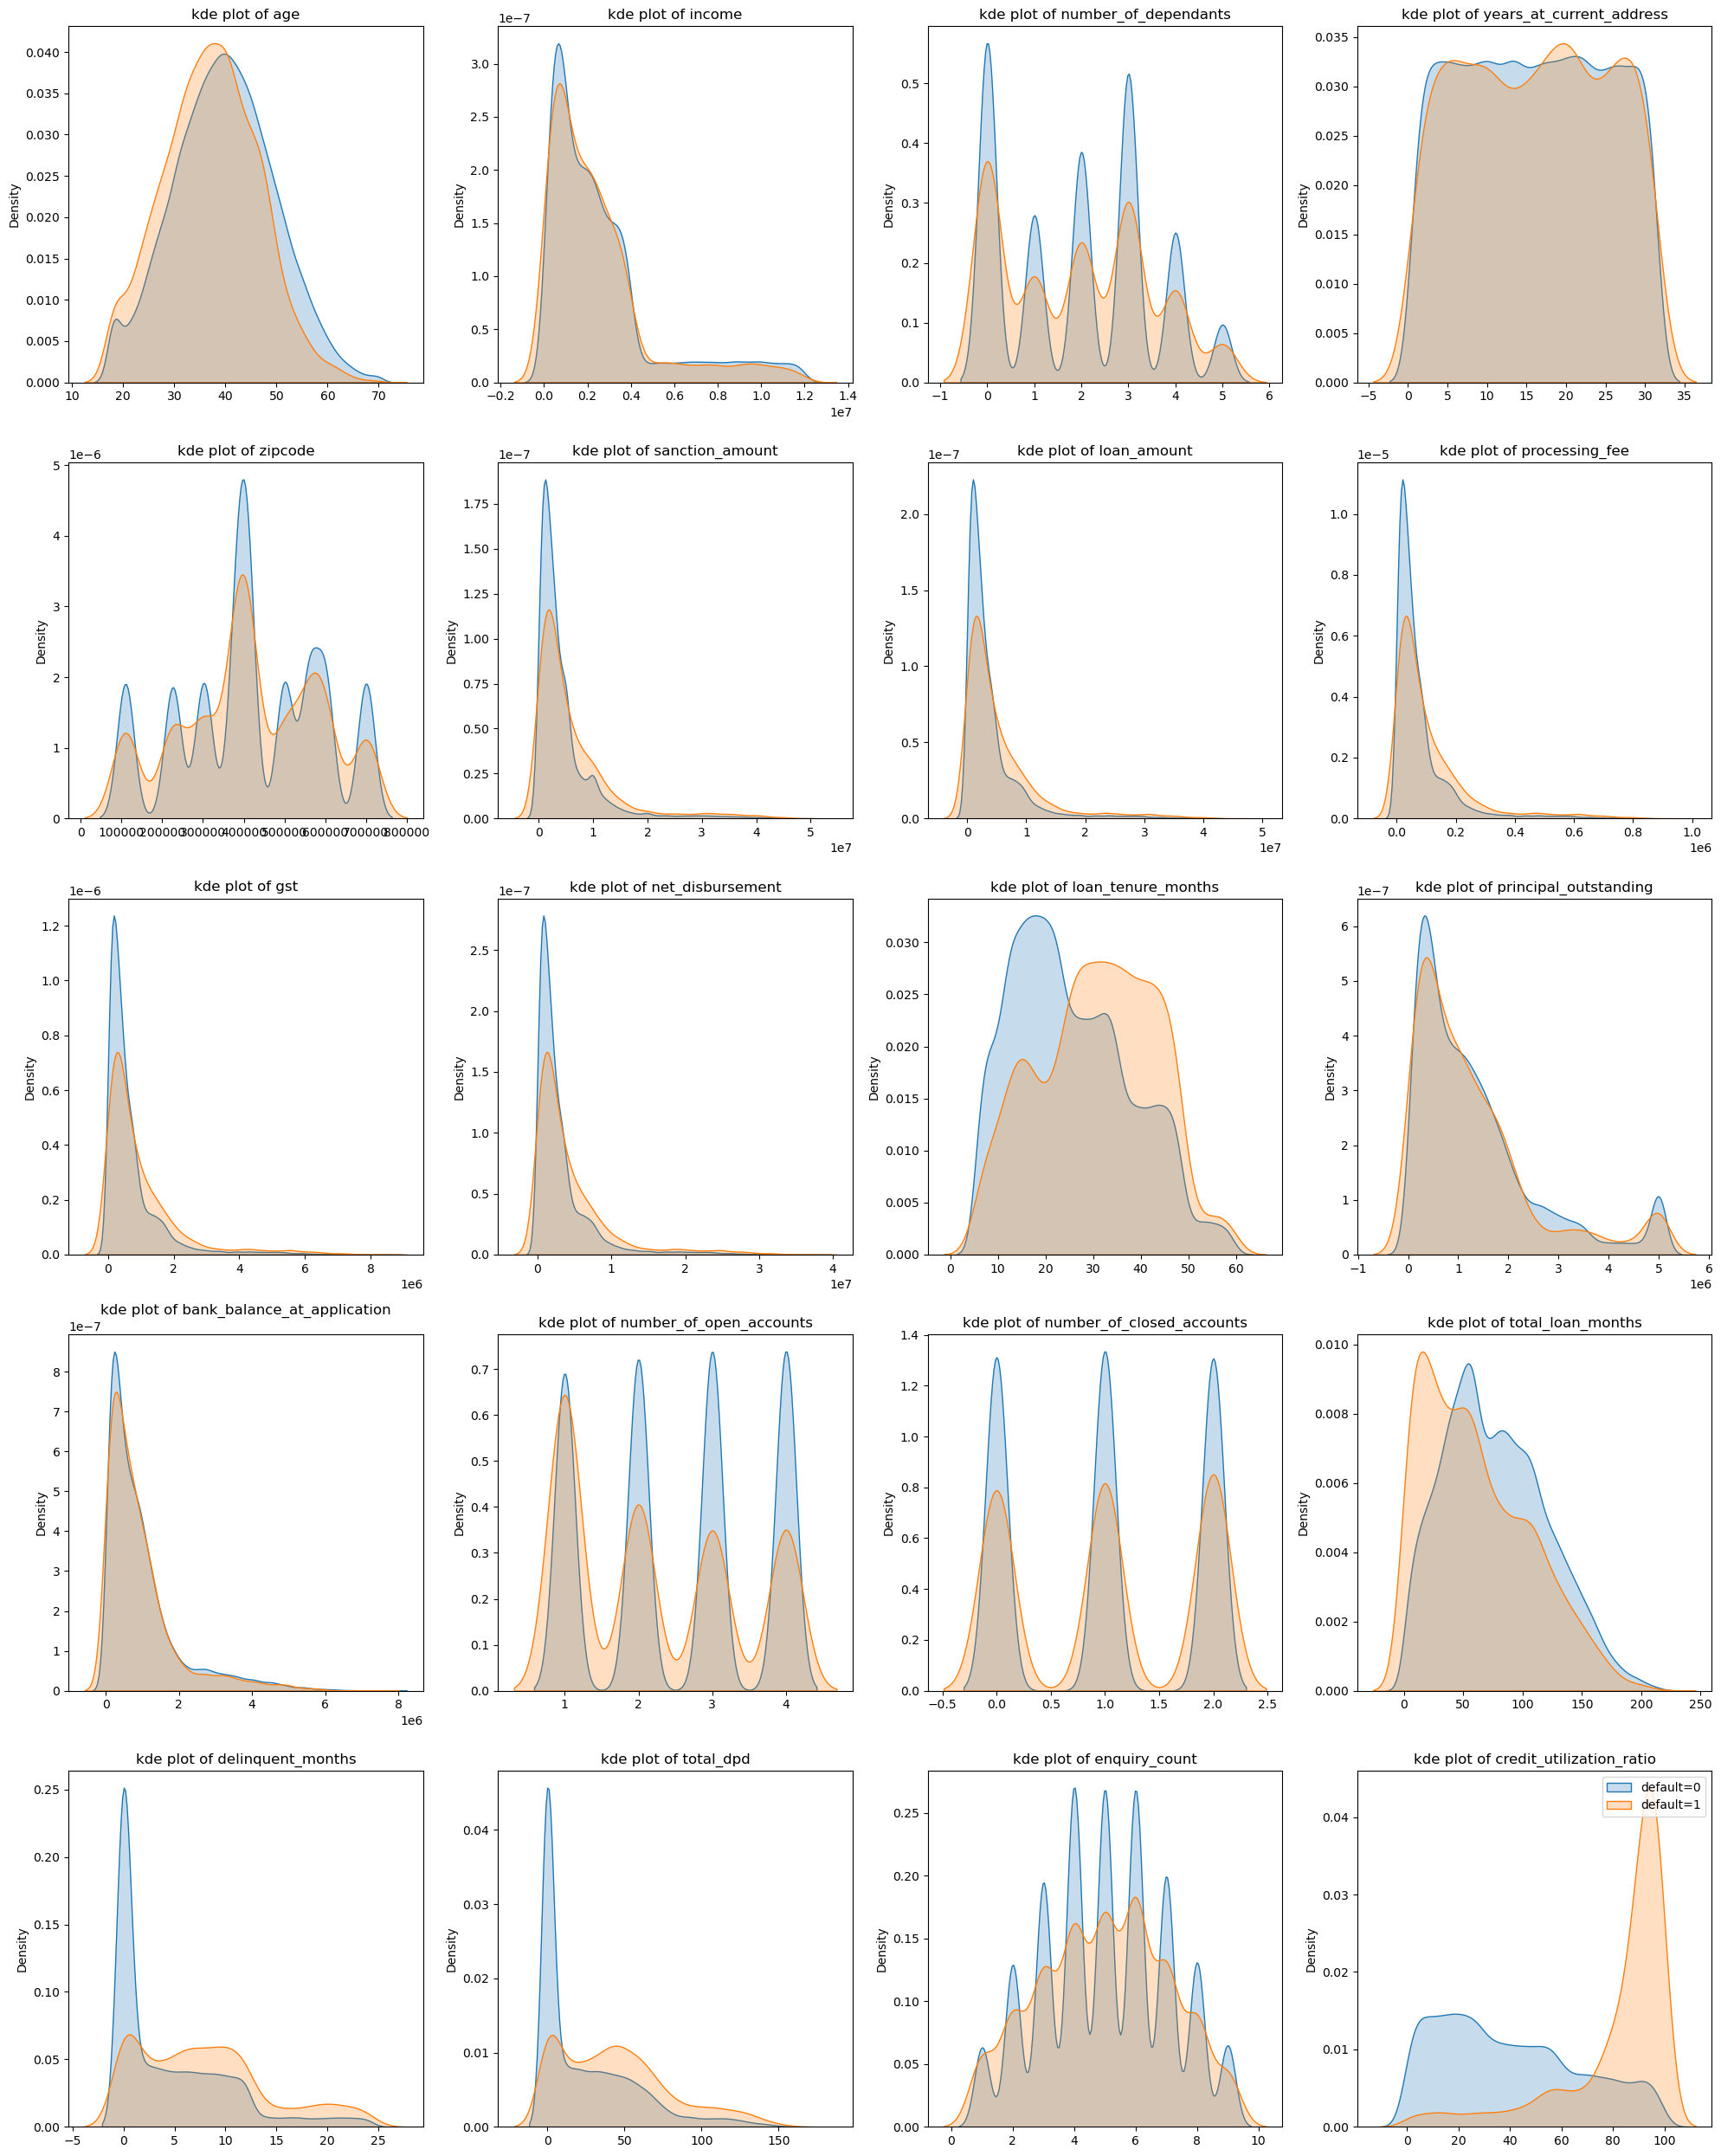

In [28]:
def create_kdeplot(df, numeric_columns):
    # Calculate the number of rows needed
    num_cols = len(numeric_columns)
    cols_per_row = 4
    num_rows = (num_cols + cols_per_row - 1) // cols_per_row
    
    # Create a figure with subplots
    fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 5*num_rows))
    
    # Flatten the axes array for easier indexing
    axes = axes.flatten() if num_rows > 1 else axes
    
    # Create boxplots for each numerical column
    for i, col in enumerate(numeric_columns):
        sns.kdeplot(data= df[df['default']==0][col], ax=axes[i],label='default=0',fill=True)
        sns.kdeplot(data= df[df['default']==1][col], ax=axes[i], label='default=1', fill = True)
        axes[i].set_title(f'kde plot of {col}')
        axes[i].set_xlabel('')  # Remove x-label as it's not needed for boxplots
        
    
    # Remove any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust layout and display
    plt.legend()
    plt.tight_layout()
    plt.show()
create_kdeplot(df_train_1,numeric_columns)

### Insights:
1: from the age distribution its clear that average age group of default group is higher than non-default group.
2: Tenure months: there is a clear deviation for the both of the groups,As lower tenure months results to likely to get the loan approved.
3:total loan months also: lesser the value is likely the reason to reject
4: credit utilization ratio : lower will be good for acceptance rate

<h3 align='center' style='color:blue'>Feature Engineering<h3/>

#### loan to income feature

In [29]:
# for train 
df_train_1['loan_to_income']=round(df_train_1['loan_amount']/df_train_1['income'],2)
df_train_1['loan_to_income'].describe()

count    37488.000000
mean         1.556711
std          0.973687
min          0.300000
25%          0.770000
50%          1.160000
75%          2.460000
max          4.570000
Name: loan_to_income, dtype: float64

In [30]:
# for test:
df_test['loan_to_income']=round(df_test['loan_amount']/df_test['income'],2)

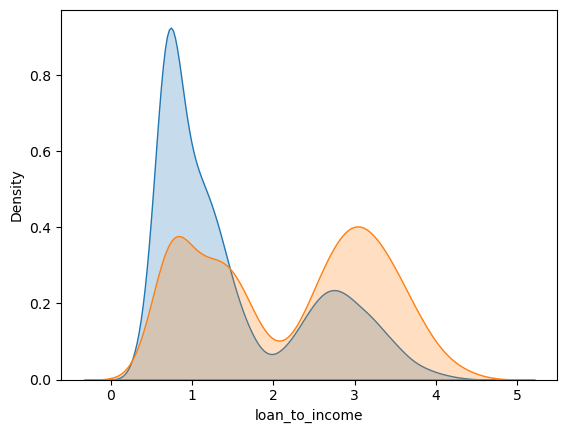

In [31]:
sns.kdeplot(data= df_train_1[df_train_1['default']==0]['loan_to_income'], label='default=0',fill=True)
sns.kdeplot(data= df_train_1[df_train_1['default']==1]['loan_to_income'],  label='default=1', fill = True)
plt.show()

### Delinquent months ratio feature:

In [32]:
# for train 
df_train_1[['delinquent_months','total_loan_months']]
df_train_1['delinquency_ratio']=round(df_train_1['delinquent_months']*100/df_train_1['total_loan_months'],2)
df_train_1.delinquent_months.describe()

count    37488.000000
mean         4.844243
std          5.840966
min          0.000000
25%          0.000000
50%          3.000000
75%          8.000000
max         24.000000
Name: delinquent_months, dtype: float64

In [33]:
# for test
df_test[['delinquent_months','total_loan_months']]
df_test['delinquency_ratio']=round(df_test['delinquent_months']*100/df_test['total_loan_months'],2)

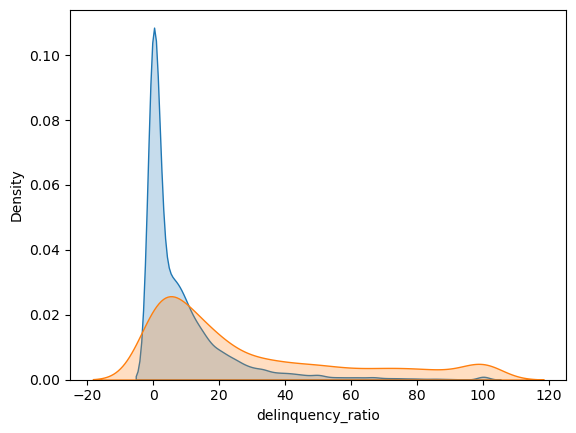

In [34]:
sns.kdeplot(data= df_train_1[df_train_1['default']==0]['delinquency_ratio'], label='default=0',fill=True)
sns.kdeplot(data= df_train_1[df_train_1['default']==1]['delinquency_ratio'],  label='default=1', fill = True)
plt.show()

### avg_dpd_per_delinquency feature


In [35]:
# for train
df_train_1['avg_dpd_per_delinquency']=np.where(
                df_train_1['delinquent_months']!=0,
                (df_train_1['total_dpd']/df_train_1['delinquent_months']).round(1)
,0)
df_train_1['avg_dpd_per_delinquency'].describe()

count    37488.000000
mean         3.283915
std          2.906633
min          0.000000
25%          0.000000
50%          4.300000
75%          5.725000
max         10.000000
Name: avg_dpd_per_delinquency, dtype: float64

In [36]:
# for test
df_test['avg_dpd_per_delinquency']=np.where(
                df_test['delinquent_months']!=0,
                (df_test['total_dpd']/df_test['delinquent_months']).round(1)
,0)

In [37]:
df_train_1['avg_dpd_per_delinquency'].isna().sum()

0

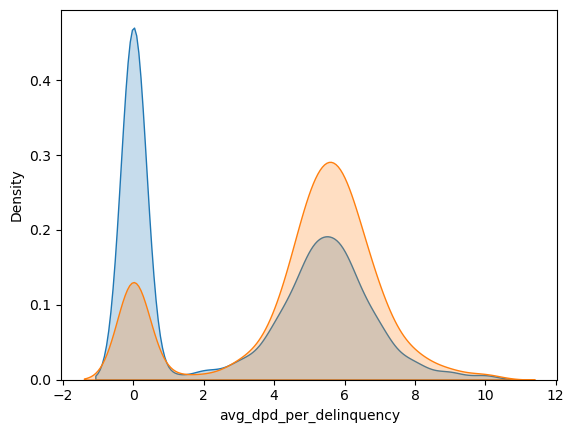

In [38]:
sns.kdeplot(data= df_train_1[df_train_1['default']==0]['avg_dpd_per_delinquency'], label='default=0',fill=True)
sns.kdeplot(data= df_train_1[df_train_1['default']==1]['avg_dpd_per_delinquency'],  label='default=1', fill = True)
plt.show()

### Remove columns that are just unique ids and don't have influence on target

In [39]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [40]:
df_train_2 = df_train_1.drop(['cust_id', 'loan_id'],axis="columns")
df_test = df_test.drop(['cust_id', 'loan_id'],axis="columns")

### Remove columns that business contact person asked us to remove

In [41]:
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_test = df_test.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [42]:
df_train_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37488 entries, 12746 to 37784
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37488 non-null  int64  
 1   gender                       37488 non-null  object 
 2   marital_status               37488 non-null  object 
 3   employment_status            37488 non-null  object 
 4   number_of_dependants         37488 non-null  int64  
 5   residence_type               37488 non-null  object 
 6   years_at_current_address     37488 non-null  int64  
 7   city                         37488 non-null  object 
 8   state                        37488 non-null  object 
 9   zipcode                      37488 non-null  int64  
 10  loan_purpose                 37488 non-null  object 
 11  loan_type                    37488 non-null  object 
 12  sanction_amount              37488 non-null  int64  
 13  processing_fee   

In [43]:
df_train_3.select_dtypes(['int64','float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

### VIF to measure multicolinearity

In [44]:
X_train=df_train_3.drop('default',axis='columns')
y_train=df_train_3['default']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale=df_train_3.select_dtypes(['int64','float64']).columns

scaler=MinMaxScaler()
X_train[cols_to_scale]=scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.00000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000
mean,0.414240,0.388903,0.499918,0.523517,0.088840,0.082513,0.082513,0.082513,0.376631,0.261615,0.123550,0.500925,0.50056,0.501077,0.438653,0.294312,0.103300,0.328391
std,0.189590,0.307182,0.297364,0.286491,0.120117,0.112480,0.112480,0.112480,0.234860,0.244461,0.133275,0.373040,0.40701,0.253666,0.296902,0.228030,0.172983,0.290663
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,0.233333,0.325424,0.020555,0.018963,0.018963,0.018963,0.188679,0.077988,0.034205,0.000000,0.00000,0.375000,0.181818,0.110070,0.000000,0.000000
50%,0.403846,0.400000,0.500000,0.491525,0.049364,0.045516,0.045516,0.045516,0.339623,0.193870,0.082515,0.666667,0.50000,0.500000,0.393939,0.201405,0.036800,0.430000
75%,0.538462,0.600000,0.766667,0.762712,0.098027,0.095555,0.095555,0.095555,0.547170,0.352418,0.155192,1.000000,1.00000,0.625000,0.676768,0.505855,0.129500,0.572500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
X_test=df_test.drop('default',axis='columns')
y_test=df_test['default']

X_test[cols_to_scale]=scaler.transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000
mean,0.415001,0.384892,0.502697,0.525015,0.089218,0.082800,0.082800,0.082800,0.375092,0.264632,0.124944,0.497293,0.500440,0.501470,0.436038,0.293038,0.106077,0.333844
std,0.188773,0.306871,0.298103,0.286179,0.120844,0.112877,0.112877,0.112877,0.233792,0.245290,0.134708,0.372576,0.407226,0.253618,0.295418,0.226176,0.173082,0.289680
min,0.000000,0.000000,0.000000,0.000000,-0.000019,-0.000126,-0.000126,-0.000126,0.000000,0.000163,0.000668,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,0.233333,0.325424,0.020958,0.019387,0.019387,0.019387,0.188679,0.079715,0.034167,0.000000,0.000000,0.375000,0.181818,0.112412,0.000000,0.000000
50%,0.423077,0.400000,0.500000,0.510169,0.050189,0.046249,0.046249,0.046249,0.339623,0.198239,0.084024,0.333333,0.500000,0.500000,0.393939,0.201405,0.042100,0.440000
75%,0.538462,0.600000,0.766667,0.762712,0.097422,0.094927,0.094927,0.094927,0.547170,0.356914,0.157792,0.666667,1.000000,0.625000,0.676768,0.498829,0.133900,0.580000
max,1.000000,1.000000,1.000000,1.000000,0.981249,0.963717,0.963717,0.963717,1.000000,1.000000,0.939154,1.000000,1.000000,1.000000,1.000000,1.004684,1.000000,1.000000


In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df= pd.DataFrame()
    vif_df['Column']= data.columns
    vif_df['VIF']= [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df


In [47]:
calculate_vif(X_train[cols_to_scale])

C:\Users\91630\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.700668
1,number_of_dependants,2.730311
2,years_at_current_address,3.422577
3,zipcode,3.797522
4,sanction_amount,101.086561
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.180522
9,principal_outstanding,16.326467


In [48]:
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement','principal_outstanding']


X_train_1 = X_train.drop(features_to_drop_vif, axis='columns')
numeric_columns = X_train_1.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [49]:
vif_df=calculate_vif(X_train_1[numeric_columns])
vif_df

,Column,VIF
0,age,5.429173
1,number_of_dependants,2.726773
2,years_at_current_address,3.403712
3,zipcode,3.777883
4,loan_tenure_months,6.018727
5,bank_balance_at_application,1.804692
6,number_of_open_accounts,4.353488
7,number_of_closed_accounts,2.372449
8,enquiry_count,6.384115
9,credit_utilization_ratio,2.919822


In [50]:
selected_numeric_features_vif = vif_df.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype=object)

In [51]:
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

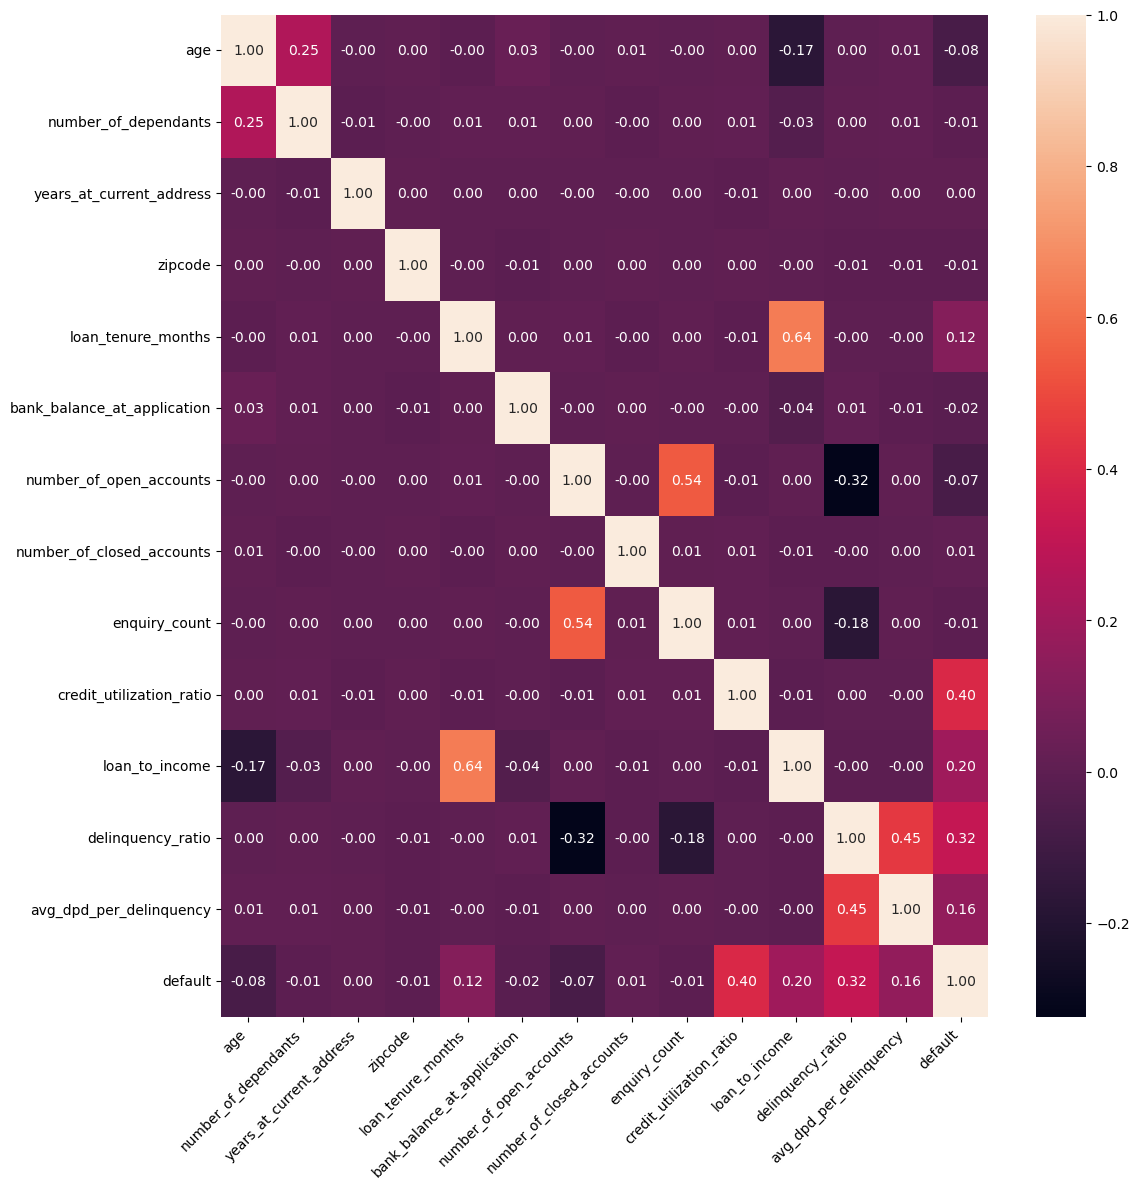

In [52]:
plt.figure(figsize=(12,12))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Feature Selection: Categorical Features using Information value

In [53]:
categorical_columns

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_purpose',
 'loan_type',
 'default']

In [54]:
def calculate_woe_iv(df, feature, target):
    grouped=df.groupby(feature)[target].agg(['count','sum'])
    grouped=grouped.rename(columns={'count':'total','sum':'good'})
    grouped['bad']=grouped['total']-grouped['good']
    
    total_good= grouped['good'].sum()
    total_bad= grouped['bad'].sum()
    
    grouped['good_pct']=grouped['good']/total_good
    grouped['bad_pct']= grouped['bad']/total_bad
    
    grouped['woe']= np.log(grouped['good_pct']/grouped['bad_pct'])
    grouped['iv']= (grouped['good_pct']-grouped['bad_pct'])*grouped['woe']
    
    grouped['woe']= grouped['woe'].replace([np.inf, -np.inf],0)
    grouped['iv']= grouped['iv'].replace([np.inf, -np.inf],0)
    
    total_iv= grouped['iv'].sum()
    
    return grouped, total_iv
grouped, total_iv= calculate_woe_iv(pd.concat([X_train_1,y_train], axis='columns'), 'loan_purpose','default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.101458,0.207792,-0.716891,0.076230
Education,5620,559,5061,0.173441,0.147702,0.160642,0.004135
Home,11304,1734,9570,0.538008,0.279294,0.655609,0.169616
Personal,13117,603,12514,0.187093,0.365212,-0.668874,0.119140


In [55]:
X_train_1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 37488 entries, 12746 to 37784
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37488 non-null  float64
 1   gender                       37488 non-null  object 
 2   marital_status               37488 non-null  object 
 3   employment_status            37488 non-null  object 
 4   number_of_dependants         37488 non-null  float64
 5   residence_type               37488 non-null  object 
 6   years_at_current_address     37488 non-null  float64
 7   city                         37488 non-null  object 
 8   state                        37488 non-null  object 
 9   zipcode                      37488 non-null  float64
 10  loan_purpose                 37488 non-null  object 
 11  loan_type                    37488 non-null  object 
 12  loan_tenure_months           37488 non-null  float64
 13  bank_balance_at_a

In [56]:
pd.concat([X_train_1, y_train],axis=1)


,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,default
12746,0.788462,M,Married,Self-Employed,0.6,Owned,0.966667,Hyderabad,Telangana,0.661017,...,0.415094,0.613386,1.000000,1.0,0.375,0.363636,0.414520,0.1316,0.59,0
32495,0.500000,F,Single,Salaried,0.0,Owned,0.866667,Mumbai,Maharashtra,0.491525,...,0.830189,0.025205,0.666667,0.5,0.500,0.050505,0.306792,0.0625,0.62,0
43675,0.384615,M,Single,Salaried,0.0,Mortgage,0.833333,Chennai,Tamil Nadu,0.830508,...,0.490566,0.174318,0.000000,0.5,0.375,0.000000,0.758782,0.2222,0.56,0
9040,0.461538,M,Married,Salaried,0.4,Mortgage,0.966667,Bangalore,Karnataka,0.762712,...,0.641509,0.077523,0.666667,0.0,0.875,0.878788,0.194379,0.0000,0.00,0
13077,0.769231,M,Married,Self-Employed,0.8,Owned,0.933333,Pune,Maharashtra,0.510169,...,0.169811,0.072271,0.000000,1.0,0.000,0.717172,0.046838,0.0000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,1.000000,M,Single,Self-Employed,0.0,Owned,0.633333,Kolkata,West Bengal,1.000000,...,0.113208,0.061603,0.333333,0.0,0.500,0.131313,0.063232,0.0000,0.00,0
5558,0.403846,F,Single,Salaried,0.0,Rented,0.833333,Kolkata,West Bengal,1.000000,...,0.490566,0.072569,0.000000,0.0,0.375,0.444444,0.189696,0.2692,0.51,0
45236,0.403846,M,Married,Self-Employed,0.8,Owned,0.300000,Pune,Maharashtra,0.510169,...,0.603774,0.063574,1.000000,1.0,0.625,0.979798,0.718970,0.0846,0.40,1
49228,0.288462,M,Single,Salaried,0.4,Owned,0.833333,Chennai,Tamil Nadu,0.830508,...,0.584906,0.058224,0.333333,0.5,0.625,0.252525,0.276347,0.0000,0.00,0


In [57]:
pd.cut(X_train_1['age'],10)

12746    (0.7, 0.8]
32495    (0.5, 0.6]
43675    (0.3, 0.4]
9040     (0.4, 0.5]
13077    (0.7, 0.8]
            ...    
28515    (0.9, 1.0]
5558     (0.4, 0.5]
45236    (0.4, 0.5]
49228    (0.2, 0.3]
37784    (0.2, 0.3]
Name: age, Length: 37488, dtype: category
Categories (10, interval[float64, right]): [(-0.001, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]

In [58]:
iv_values={}

for feature in X_train_1.columns:
    target='default'
    if X_train_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), feature, target )
        iv_values[feature]= iv
    else:
        X_binned=pd.cut(X_train_1[feature],10, labels= False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train],axis=1), feature, target )
        iv_values[feature]= iv
iv_values
        

{'age': 0.0890689462679479,
 'gender': 0.00047449502170914947,
 'marital_status': 0.001129766845390142,
 'employment_status': 0.003953046301722585,
 'number_of_dependants': 0.0019380899135053508,
 'residence_type': 0.246745268718145,
 'years_at_current_address': 0.0020800513608156363,
 'city': 0.0019059578709781529,
 'state': 0.0019005589806779287,
 'zipcode': 0.0016677413243392572,
 'loan_purpose': 0.3691197842282755,
 'loan_type': 0.16319324904149224,
 'loan_tenure_months': 0.21893515090196278,
 'bank_balance_at_application': 0.0063187993277516365,
 'number_of_open_accounts': 0.08463134083005877,
 'number_of_closed_accounts': 0.0011964272592421567,
 'enquiry_count': 0.007864214085342608,
 'credit_utilization_ratio': 2.352965568168245,
 'loan_to_income': 0.476415456948364,
 'delinquency_ratio': 0.716576108689321,
 'avg_dpd_per_delinquency': 0.40151905412190175}

In [59]:
iv_df= pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df= iv_df.sort_values(by='IV', ascending= False)
iv_df


,Feature,IV
17,credit_utilization_ratio,2.352966
19,delinquency_ratio,0.716576
18,loan_to_income,0.476415
20,avg_dpd_per_delinquency,0.401519
10,loan_purpose,0.369120
5,residence_type,0.246745
12,loan_tenure_months,0.218935
11,loan_type,0.163193
0,age,0.089069
14,number_of_open_accounts,0.084631


In [60]:
selected_features_iv = [feature for feature, iv in iv_values.items() if iv>0.02 ]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

### Feature Encoding


In [61]:
X_train_reduced= X_train_1[selected_features_iv]
X_test_reduced= X_test[selected_features_iv]

In [62]:
X_test_reduced.head()

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
19205,0.346154,Owned,Home,Secured,0.754717,0.333333,0.989899,0.550351,0.0000,0.00
15514,0.480769,Owned,Education,Secured,0.226415,1.000000,0.323232,0.220141,0.0000,0.00
30367,0.230769,Owned,Auto,Secured,0.547170,0.666667,0.828283,0.180328,0.0000,0.00
35347,0.365385,Owned,Home,Secured,0.754717,1.000000,0.484848,0.571429,0.0240,0.70
41814,0.576923,Mortgage,Home,Secured,0.716981,0.666667,0.979798,0.407494,0.1069,0.64


In [63]:
X_train_encoded= pd.get_dummies(X_train_reduced, drop_first= True)
X_test_encoded=  pd.get_dummies(X_test_reduced, drop_first= True)

X_train_encoded.head()

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.788462,0.415094,1.000000,0.363636,0.414520,0.1316,0.59,True,False,False,True,False,False
32495,0.500000,0.830189,0.666667,0.050505,0.306792,0.0625,0.62,True,False,True,False,False,False
43675,0.384615,0.490566,0.000000,0.000000,0.758782,0.2222,0.56,False,False,False,True,False,False
9040,0.461538,0.641509,0.666667,0.878788,0.194379,0.0000,0.00,False,False,True,False,False,False
13077,0.769231,0.169811,0.000000,0.717172,0.046838,0.0000,0.00,True,False,False,False,True,True


## Model Training

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.72      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



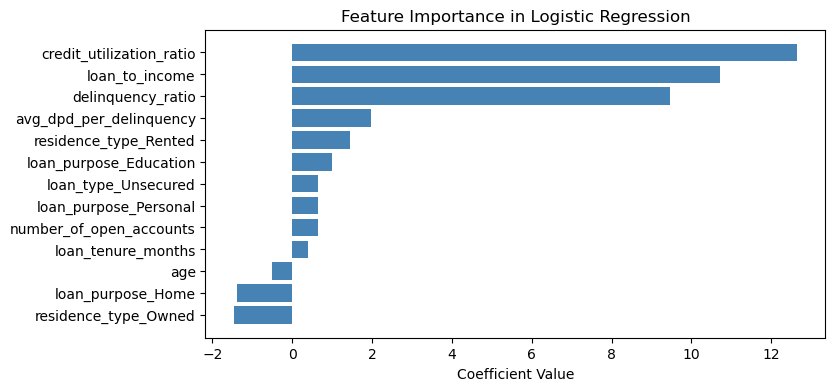

In [65]:
feature_importance = model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [66]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

y_pred= model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.72      0.78      1074

    accuracy                           0.97     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.97      0.96     12497



In [67]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.82      0.77      0.79      1074

    accuracy                           0.97     12497
   macro avg       0.90      0.88      0.89     12497
weighted avg       0.96      0.97      0.96     12497



#### RandomizedSearch CV for Attempt 1: Logistic Regression

In [68]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'newton-cg', 'C': 545.5594781168514}
Best Score: 0.7579612918377666
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.83      0.74      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.86      0.88     12497
weighted avg       0.96      0.96      0.96     12497



#### RandomizedSearch CV for Attempt 1: XGBoost

In [69]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.7892361105219333
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.78      0.84      0.81      1074

    accuracy                           0.97     12497
   macro avg       0.88      0.91      0.89     12497
weighted avg       0.97      0.97      0.97     12497



### Attempt 2

1. Logistic Regression & XGB
1. Handle Class Imbalance Using Under Sampling

In [70]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train_encoded, y_train)
y_train_res.value_counts()

default
0    3223
1    3223
Name: count, dtype: int64

In [71]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.96      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.93      0.81     12497
weighted avg       0.95      0.92      0.93     12497



In [72]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.99      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.95      0.81     12497
weighted avg       0.96      0.92      0.93     12497



### Attempt 3

1. Logistic Regression
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [73]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded, y_train)
y_train_smt.value_counts()

default
0    34194
1    34194
Name: count, dtype: int64

In [74]:
model = LogisticRegression()
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.55      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [75]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [76]:
def objective(trail):
    param = {
        'C': trail.suggest_float('C',1e-4,1e4, log=True), #logarithmically spaced values
        'solver': trail.suggest_categorical('solver',['lbfgs','liblinear','saga','newton-cg']), #solvers
        'tol': trail.suggest_float('tol',1e-6 ,1e-1, log=True), 
        'class_weight': trail.suggest_categorical('class_weight', [None, 'balanced']) # class weights
    }
    model = LogisticRegression(**param, max_iter= 10000)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_logistic = optuna.create_study(direction= 'maximize')
study_logistic.optimize(objective, n_trials=50 )
                            

[I 2025-03-11 10:57:14,690] A new study created in memory with name: no-name-9b25b329-cb15-49d7-bccd-26682170211a
[I 2025-03-11 10:57:14,984] Trial 0 finished with value: 0.859183408775841 and parameters: {'C': 40.5029267141073, 'solver': 'newton-cg', 'tol': 0.04293318569499518, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.859183408775841.
[I 2025-03-11 10:57:15,357] Trial 1 finished with value: 0.9078398430163314 and parameters: {'C': 0.004178002808502685, 'solver': 'liblinear', 'tol': 5.4075085552608156e-05, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.9078398430163314.
[I 2025-03-11 10:57:15,802] Trial 2 finished with value: 0.9456339285199765 and parameters: {'C': 5210.049490402297, 'solver': 'saga', 'tol': 0.002059737988558812, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.9456339285199765.
[I 2025-03-11 10:57:15,960] Trial 3 finished with value: 0.8825781175645292 and parameters: {'C': 0.009544968885674519, 'solver': 'lbfgs', 'tol': 0.0368

[I 2025-03-11 10:57:39,530] Trial 34 finished with value: 0.945822399611148 and parameters: {'C': 3.0476726125706715, 'solver': 'lbfgs', 'tol': 2.4338306240108406e-05, 'class_weight': None}. Best is trial 32 with value: 0.9458660702838406.
[I 2025-03-11 10:57:39,901] Trial 35 finished with value: 0.9370195726352346 and parameters: {'C': 0.03413454054691015, 'solver': 'lbfgs', 'tol': 2.573940938122753e-05, 'class_weight': 'balanced'}. Best is trial 32 with value: 0.9458660702838406.
[I 2025-03-11 10:57:40,252] Trial 36 finished with value: 0.9456906569585112 and parameters: {'C': 2.6823928769708454, 'solver': 'lbfgs', 'tol': 0.00010846249661987969, 'class_weight': None}. Best is trial 32 with value: 0.9458660702838406.
[I 2025-03-11 10:57:40,778] Trial 37 finished with value: 0.945706866885356 and parameters: {'C': 27.369503718659875, 'solver': 'lbfgs', 'tol': 1.7761290743830502e-05, 'class_weight': 'balanced'}. Best is trial 32 with value: 0.9458660702838406.
[I 2025-03-11 10:57:41,227

In [77]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
    
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9458797428775179
  Params: 
    C: 1.869868019085199
    solver: saga
    tol: 3.6640405317579354e-06
    class_weight: None
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [78]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-03-11 10:57:49,843] A new study created in memory with name: no-name-0fe825c1-5849-4af3-8af4-7c7e9e6f1562
[I 2025-03-11 10:57:51,470] Trial 0 finished with value: 0.9634333267954472 and parameters: {'lambda': 1.0500033171833512, 'alpha': 0.010817491497410799, 'subsample': 0.574426734084003, 'colsample_bytree': 0.6878399176566028, 'max_depth': 9, 'eta': 0.2717144371182365, 'gamma': 9.794997691110973, 'scale_pos_weight': 5.516377728693694, 'min_child_weight': 2, 'max_delta_step': 5}. Best is trial 0 with value: 0.9634333267954472.
[I 2025-03-11 10:57:52,666] Trial 1 finished with value: 0.9625094866647889 and parameters: {'lambda': 0.41244555011251877, 'alpha': 0.006269777910317201, 'subsample': 0.8457867715074949, 'colsample_bytree': 0.9111544707173274, 'max_depth': 4, 'eta': 0.2915509685786125, 'gamma': 5.694524820750298, 'scale_pos_weight': 5.351577238256368, 'min_child_weight': 7, 'max_delta_step': 5}. Best is trial 0 with value: 0.9634333267954472.
[I 2025-03-11 10:57:54,133

[I 2025-03-11 10:58:27,511] Trial 19 finished with value: 0.968953845058827 and parameters: {'lambda': 0.04425204941767208, 'alpha': 0.03276312727903263, 'subsample': 0.8006922903650664, 'colsample_bytree': 0.6406679870940597, 'max_depth': 5, 'eta': 0.17530700146179112, 'gamma': 1.4974416222800961, 'scale_pos_weight': 2.0354275295063715, 'min_child_weight': 1, 'max_delta_step': 7}. Best is trial 6 with value: 0.9704386509295543.
[I 2025-03-11 10:58:28,508] Trial 20 finished with value: 0.9497429851592004 and parameters: {'lambda': 0.13034851829514954, 'alpha': 0.0010079672565716034, 'subsample': 0.6929004470123226, 'colsample_bytree': 0.7555606825587609, 'max_depth': 3, 'eta': 0.24661588268111073, 'gamma': 1.5459617477578695, 'scale_pos_weight': 7.21566224739754, 'min_child_weight': 1, 'max_delta_step': 10}. Best is trial 6 with value: 0.9704386509295543.
[I 2025-03-11 10:58:29,920] Trial 21 finished with value: 0.9683234986978375 and parameters: {'lambda': 0.05562101388867909, 'alpha'

[I 2025-03-11 10:59:10,430] Trial 38 finished with value: 0.9734352780536026 and parameters: {'lambda': 0.010609408456987733, 'alpha': 0.0027763798779993133, 'subsample': 0.6123594497891076, 'colsample_bytree': 0.8965399188285957, 'max_depth': 9, 'eta': 0.27702970782948844, 'gamma': 2.015861311729093, 'scale_pos_weight': 6.915389263211661, 'min_child_weight': 1, 'max_delta_step': 4}. Best is trial 29 with value: 0.9743575089314721.
[I 2025-03-11 10:59:12,650] Trial 39 finished with value: 0.9693737413814811 and parameters: {'lambda': 0.5777546633509996, 'alpha': 0.0013136317807020106, 'subsample': 0.6395375867206585, 'colsample_bytree': 0.9430722277620063, 'max_depth': 10, 'eta': 0.22269500650038865, 'gamma': 4.990554623892081, 'scale_pos_weight': 8.379188274478569, 'min_child_weight': 1, 'max_delta_step': 6}. Best is trial 29 with value: 0.9743575089314721.
[I 2025-03-11 10:59:14,917] Trial 40 finished with value: 0.972908150364293 and parameters: {'lambda': 0.0238655534094118, 'alpha

In [79]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9747235331950469
  Params: 
    lambda: 0.0018993903562224926
    alpha: 0.009189391872408454
    subsample: 0.5134916578203934
    colsample_bytree: 0.9939195901691166
    max_depth: 10
    eta: 0.25887219730536637
    gamma: 1.9990084981244656
    scale_pos_weight: 5.987724928097509
    min_child_weight: 2
    max_delta_step: 5
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     11423
           1       0.67      0.88      0.77      1074

    accuracy                           0.95     12497
   macro avg       0.83      0.92      0.87     12497
weighted avg       0.96      0.95      0.96     12497



### Since the Logistic regression has higger precision value even the macro f1 score increased. So i choose logistic regression as my best model

## Model Evaluation : ROC/AUC

In [80]:
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [81]:
from sklearn.metrics import roc_curve

probabilites = best_model_logistic.predict_proba(X_test_encoded)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, probabilites)
fpr[:5], tpr[:5], thresholds[:5]

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.75426771e-05,
        8.75426771e-05]),
 array([0.        , 0.0009311 , 0.16294227, 0.16294227, 0.17877095]),
 array([       inf, 1.        , 0.99935914, 0.99933658, 0.99919959]))

In [82]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

0.983705406012992

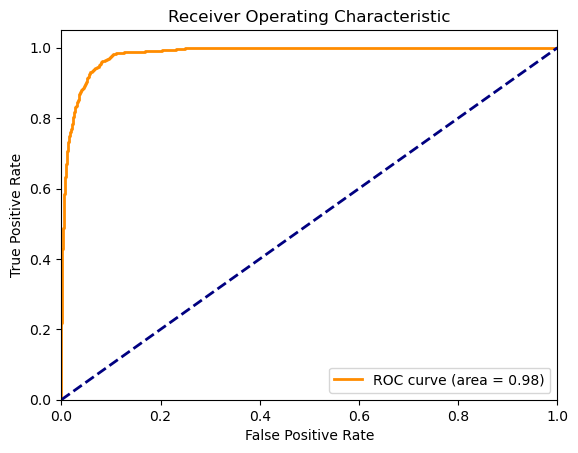

In [83]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Model Evaluation : Rankordering, KS statistic, Gini coeff

In [84]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
df_eval.head(3)

,Default Truth,Default Probability
19205,0,0.544295
15514,0,0.000015
30367,0,0.006338


In [85]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head(3)

,Default Truth,Default Probability,Decile
19205,0,0.544295,8
15514,0,0.000015,2
30367,0,0.006338,6


In [86]:
df_eval[df_eval.Decile==8]['Default Probability'].describe()

count    1250.000000
mean        0.487951
std         0.179317
min         0.218862
25%         0.322230
50%         0.470839
75%         0.640526
max         0.817125
Name: Default Probability, dtype: float64

In [87]:
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),    
}))
df_decile.reset_index(inplace=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,2.028673e-09,0.000001,0.0,1250.0
1,1,1.046333e-06,0.000008,0.0,1250.0
2,2,7.772587e-06,0.000038,0.0,1249.0
3,3,3.791149e-05,0.000185,0.0,1250.0
4,4,1.855115e-04,0.000905,0.0,1250.0
5,5,9.052612e-04,0.004938,0.0,1249.0
6,6,4.939174e-03,0.031459,5.0,1245.0
7,7,3.148984e-02,0.218860,11.0,1238.0
8,8,2.188617e-01,0.817125,161.0,1089.0
9,9,8.173568e-01,1.000000,897.0,353.0


In [88]:
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,0,2.028673e-09,0.000001,0.0,1250.0,0.000000,100.000000
1,1,1.046333e-06,0.000008,0.0,1250.0,0.000000,100.000000
2,2,7.772587e-06,0.000038,0.0,1249.0,0.000000,100.000000
3,3,3.791149e-05,0.000185,0.0,1250.0,0.000000,100.000000
4,4,1.855115e-04,0.000905,0.0,1250.0,0.000000,100.000000
5,5,9.052612e-04,0.004938,0.0,1249.0,0.000000,100.000000
6,6,4.939174e-03,0.031459,5.0,1245.0,0.400000,99.600000
7,7,3.148984e-02,0.218860,11.0,1238.0,0.880705,99.119295
8,8,2.188617e-01,0.817125,161.0,1089.0,12.880000,87.120000
9,9,8.173568e-01,1.000000,897.0,353.0,71.760000,28.240000


In [89]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,9,8.173568e-01,1.000000,897.0,353.0,71.760000,28.240000
1,8,2.188617e-01,0.817125,161.0,1089.0,12.880000,87.120000
2,7,3.148984e-02,0.218860,11.0,1238.0,0.880705,99.119295
3,6,4.939174e-03,0.031459,5.0,1245.0,0.400000,99.600000
4,5,9.052612e-04,0.004938,0.0,1249.0,0.000000,100.000000
5,4,1.855115e-04,0.000905,0.0,1250.0,0.000000,100.000000
6,3,3.791149e-05,0.000185,0.0,1250.0,0.000000,100.000000
7,2,7.772587e-06,0.000038,0.0,1249.0,0.000000,100.000000
8,1,1.046333e-06,0.000008,0.0,1250.0,0.000000,100.000000
9,0,2.028673e-09,0.000001,0.0,1250.0,0.000000,100.000000


In [90]:
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
0,9,8.173568e-01,1.000000,897.0,353.0,71.760000,28.240000,897.0,353.0
1,8,2.188617e-01,0.817125,161.0,1089.0,12.880000,87.120000,1058.0,1442.0
2,7,3.148984e-02,0.218860,11.0,1238.0,0.880705,99.119295,1069.0,2680.0
3,6,4.939174e-03,0.031459,5.0,1245.0,0.400000,99.600000,1074.0,3925.0
4,5,9.052612e-04,0.004938,0.0,1249.0,0.000000,100.000000,1074.0,5174.0
5,4,1.855115e-04,0.000905,0.0,1250.0,0.000000,100.000000,1074.0,6424.0
6,3,3.791149e-05,0.000185,0.0,1250.0,0.000000,100.000000,1074.0,7674.0
7,2,7.772587e-06,0.000038,0.0,1249.0,0.000000,100.000000,1074.0,8923.0
8,1,1.046333e-06,0.000008,0.0,1250.0,0.000000,100.000000,1074.0,10173.0
9,0,2.028673e-09,0.000001,0.0,1250.0,0.000000,100.000000,1074.0,11423.0


In [91]:
df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,8.173568e-01,1.000000,897.0,353.0,71.760000,28.240000,897.0,353.0,83.519553,3.090257
1,8,2.188617e-01,0.817125,161.0,1089.0,12.880000,87.120000,1058.0,1442.0,98.510242,12.623654
2,7,3.148984e-02,0.218860,11.0,1238.0,0.880705,99.119295,1069.0,2680.0,99.534451,23.461437
3,6,4.939174e-03,0.031459,5.0,1245.0,0.400000,99.600000,1074.0,3925.0,100.000000,34.360501
4,5,9.052612e-04,0.004938,0.0,1249.0,0.000000,100.000000,1074.0,5174.0,100.000000,45.294581
5,4,1.855115e-04,0.000905,0.0,1250.0,0.000000,100.000000,1074.0,6424.0,100.000000,56.237416
6,3,3.791149e-05,0.000185,0.0,1250.0,0.000000,100.000000,1074.0,7674.0,100.000000,67.180250
7,2,7.772587e-06,0.000038,0.0,1249.0,0.000000,100.000000,1074.0,8923.0,100.000000,78.114331
8,1,1.046333e-06,0.000008,0.0,1250.0,0.000000,100.000000,1074.0,10173.0,100.000000,89.057165
9,0,2.028673e-09,0.000001,0.0,1250.0,0.000000,100.000000,1074.0,11423.0,100.000000,100.000000


To assess whether rank ordering is followed, we should look at whether higher deciles (those with higher predicted probabilities) have higher event rates compared to lower deciles. Rank ordering means that as you move from the top decile to the bottom decile, the event rate should generally decrease.

Non-Events - termed as good (customers) who do not default. Events - termed as bad (customers) who default.

Events and Non-Events terms are interchanged based on usecase to usecase.

eg: for marketing usecase, which customer to reach out (who will take loan based on offers) will be events - here it will termed as good, and the customers who will not take loans will be non-events (bad).

**Insights from the Decile Table**

1. Top Deciles

* The first decile (Decile 9) has a high event rate of 72.00% and a non-event rate of 28.00%. This indicates that the model is highly confident in predicting events in this decile.
* The second decile (Decile 8) also shows a significant event rate of 12.72%, with a cumulative event rate reaching 98.6%.

2. Middle Deciles:

* Deciles 7 and 6 show a significant drop in event rates

3. Lower Deciles:

* Deciles 5 to 0 show zero events, with all predictions being non-events. These deciles collectively have a non-event rate of 100%.

4. KS Statistic:

* The KS statistic, which is the maximum difference between cumulative event rates and cumulative non-event rates, is highest at Decile 8 with a value of 85.98%. This suggests that the model performs best at distinguishing between events and non-events up to this decile.

* The KS value gradually decreases in the following deciles, indicating a decrease in model performance for distinguishing between events and non-events.

**KS Value**


The highest KS value is 85.98%, found at Decile 8. This indicates that the model's performance in distinguishing between events and non-events is most significant at this decile. (If KS is in top 3 decile and score above 40, it is considered a good predictive model.)


In [92]:
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.983705406012992
Gini Coefficient: 0.9674108120259839


AUC of 0.98: The model is very good at distinguishing between events and non-events.

Gini coefficient of 0.96: This further confirms that the model is highly effective in its predictions, with almost perfect rank ordering capability.

The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.

#### Finalize The Model and Visualize Feature Importance

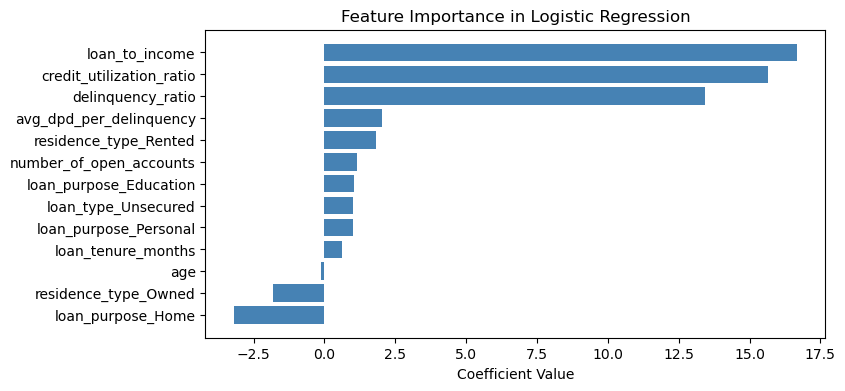

In [94]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Save the Model

In [95]:
X_test_encoded.head(2)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.346154,0.754717,0.333333,0.989899,0.550351,0.0,0.0,True,False,False,True,False,False
15514,0.480769,0.226415,1.000000,0.323232,0.220141,0.0,0.0,True,False,True,False,False,False


In [96]:
X_test_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [97]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [98]:
X_train_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [100]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data, 'artifacts/model_data.joblib')

['artifacts/model_data.joblib']